## PREGUNTA 1 - EXAMEN PARCIAL JAUREGUI ROMERO EDUARDO RAFAEL
Tenemos el conjunto de datos de ruido propio de la superficie aerodinámica. Este conjunto de datos de la NASA 
comprende superficies aerodinámicas NACA 0012 de diferentes tamaños a varias velocidades de túnel de viento y 
ángulos de ataque. El tramo del perfil aerodinámico y la posición del observador fueron los mismos en todos los 
experimentos.

Este problema tiene las siguientes entradas:
1. Frecuencia, en hercios.
2. Ángulo de ataque, en grados.
3. Longitud de la cuerda, en metros.
4. Velocidad de flujo libre, en metros por segundo.
5. Espesor de desplazamiento del lado de succión, en metros.

La única salida es:
**6. Nivel de presión sonora escalado, en decibelios.**

En un notebook desarrolle un modelo o modelos que permita predecir el nivel de presión sonora a escala en decibelios. 
En cada caso debe colocar la forma en la que se recuperan los datos, análisis exploratorio de los datos, transformación 
de datos si fuera el caso, selección del conjunto de entrenamiento y prueba, evaluación del modelo o modelos 
desarrollados y conclusión sobre el mejor modelo elegido.

# IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAMOS DATOS

In [23]:
df=pd.read_table("airfoil_self_noise.dat")

In [24]:
encabezado=['Frecuencia','Angulo de Ataque','Longitud de Cuerda','Velocidad','Espesor de desplazamiento',
           'Nivel de presion sonora escalado']

In [25]:
df.columns=encabezado

In [29]:
df.head()

,Frecuencia,Angulo de Ataque,Longitud de Cuerda,Velocidad,Espesor de desplazamiento,Nivel de presion sonora escalado
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [30]:
df.tail()

,Frecuencia,Angulo de Ataque,Longitud de Cuerda,Velocidad,Espesor de desplazamiento,Nivel de presion sonora escalado
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224
1501,6300,15.6,0.1016,39.6,0.052849,104.204


In [31]:
df.describe()

,Frecuencia,Angulo de Ataque,Longitud de Cuerda,Velocidad,Espesor de desplazamiento,Nivel de presion sonora escalado
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Frecuencia                        1502 non-null   int64  
 1   Angulo de Ataque                  1502 non-null   float64
 2   Longitud de Cuerda                1502 non-null   float64
 3   Velocidad                         1502 non-null   float64
 4   Espesor de desplazamiento         1502 non-null   float64
 5   Nivel de presion sonora escalado  1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


# ANALISIS EXPLORATORIO DE DATOS

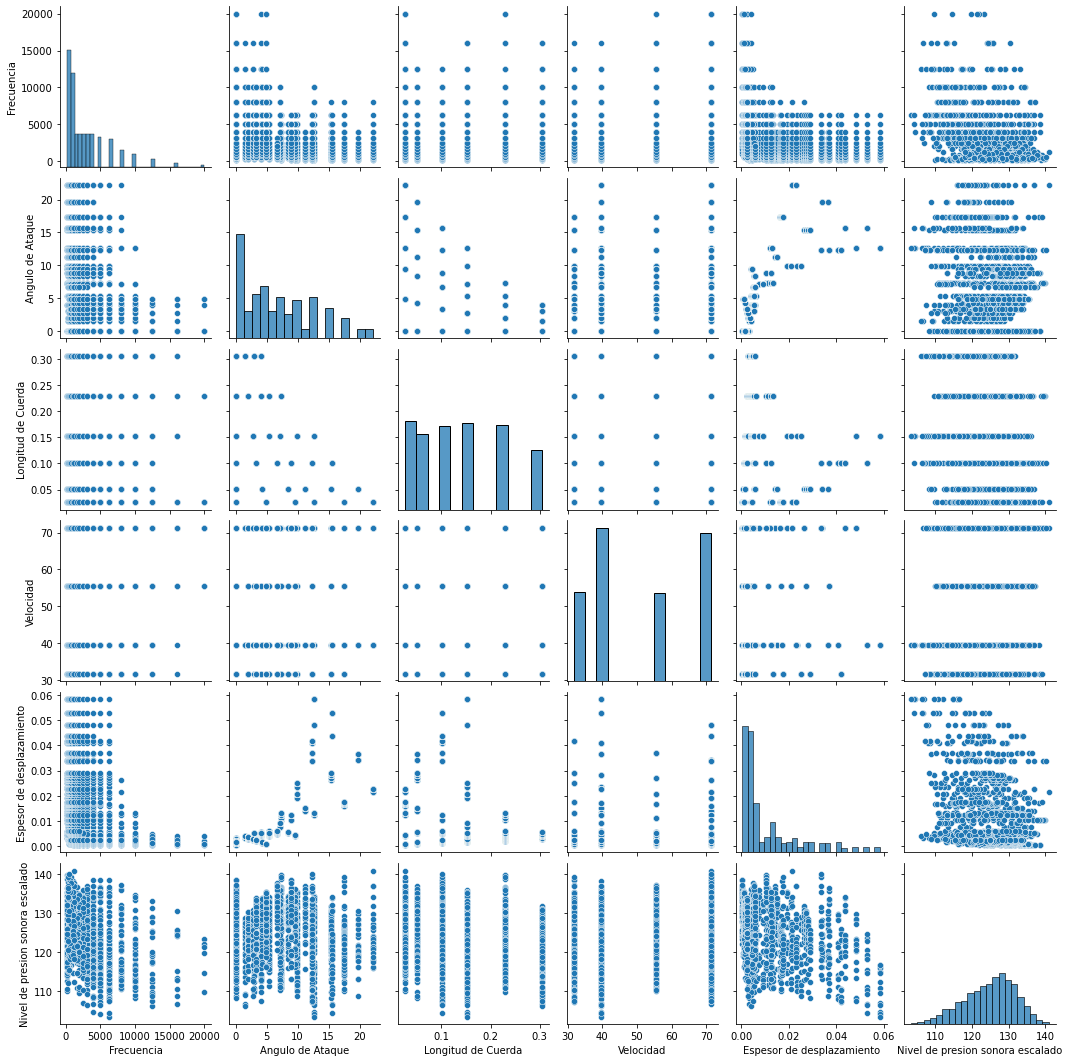

In [34]:
sns.pairplot(df)

<AxesSubplot:>

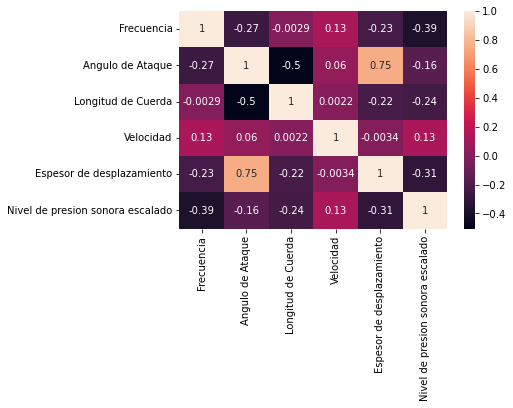

In [35]:
sns.heatmap(df.corr(),annot=True) #MAPA DE COLOR

In [36]:
sns.set_theme(style="whitegrid", palette="pastel")

In [37]:
df.columns

Index(['Frecuencia', 'Angulo de Ataque', 'Longitud de Cuerda', 'Velocidad',
       'Espesor de desplazamiento', 'Nivel de presion sonora escalado'],
      dtype='object')

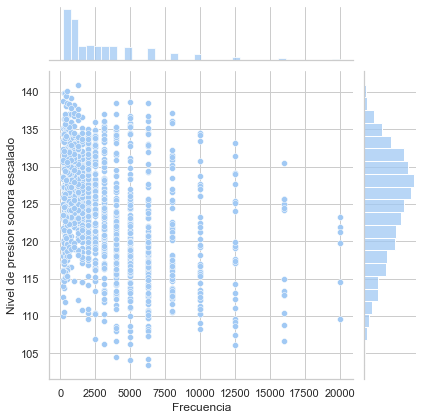

In [39]:
sns.jointplot(data=df, x="Frecuencia", y="Nivel de presion sonora escalado")

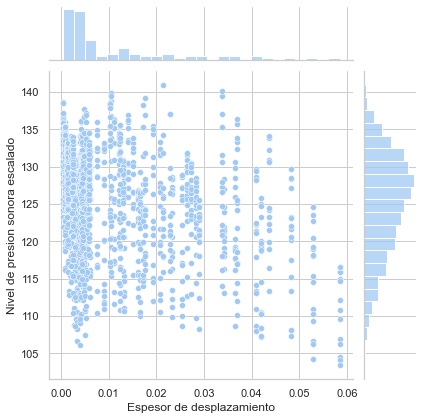

In [40]:
sns.jointplot(data=df, x="Espesor de desplazamiento", y="Nivel de presion sonora escalado")

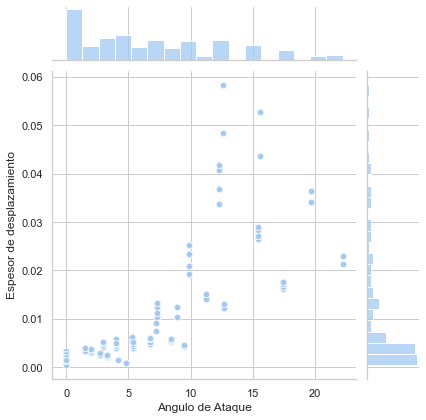

In [41]:
sns.jointplot(data=df, x="Angulo de Ataque", y="Espesor de desplazamiento")

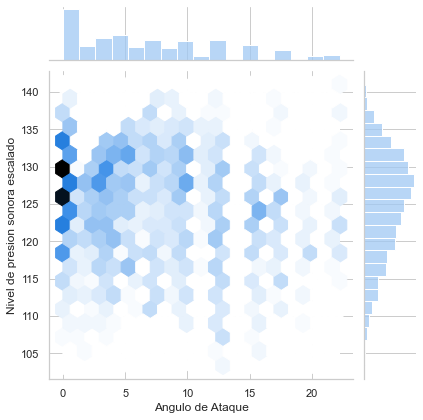

In [42]:
sns.jointplot(data=df, x="Angulo de Ataque", y="Nivel de presion sonora escalado",kind='hex')

<AxesSubplot:>

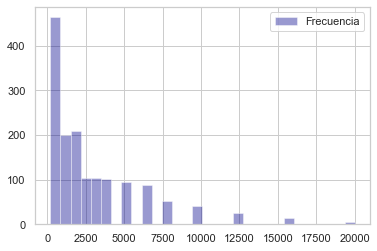

In [43]:
df['Frecuencia'].hist(bins=30,legend=True,color='darkblue',alpha=0.4)

# REGRESION LINEAL MULTIPLE

Dividamos en datos de entrenamiento y de prueba, y entrenemos nuestro model

In [45]:
df.head()

,Frecuencia,Angulo de Ataque,Longitud de Cuerda,Velocidad,Espesor de desplazamiento,Nivel de presion sonora escalado
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [48]:
X=df.drop(['Nivel de presion sonora escalado'],axis=1)

In [50]:
X.head()

,Frecuencia,Angulo de Ataque,Longitud de Cuerda,Velocidad,Espesor de desplazamiento
0,1000,0.0,0.3048,71.3,0.002663
1,1250,0.0,0.3048,71.3,0.002663
2,1600,0.0,0.3048,71.3,0.002663
3,2000,0.0,0.3048,71.3,0.002663
4,2500,0.0,0.3048,71.3,0.002663


In [51]:
y=df['Nivel de presion sonora escalado']

In [52]:
y.head()

0    125.201
1    125.951
2    127.591
3    127.461
4    125.571
Name: Nivel de presion sonora escalado, dtype: float64

# CREAR Y ENTRENAR MODELO 1

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=107)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
modeloLineal = LinearRegression()

In [70]:
modeloLineal.fit(X_train,y_train)

LinearRegression()

# EVALUACION DEL MODELO

In [71]:
print("Interceptor: ",modeloLineal.intercept_)

Interceptor:  131.98497174127922


In [72]:
print("Coeficientes:",modeloLineal.coef_)

Coeficientes: [-1.33895321e-03 -3.32156112e-01 -3.28724796e+01  1.05853456e-01
 -1.68679177e+02]


# PREDICCIONES DEL MODELO

In [73]:
predicciones = modeloLineal.predict(X_test)

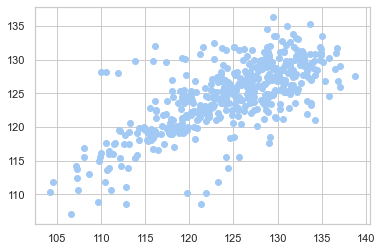

In [74]:
plt.scatter(y_test,predicciones)

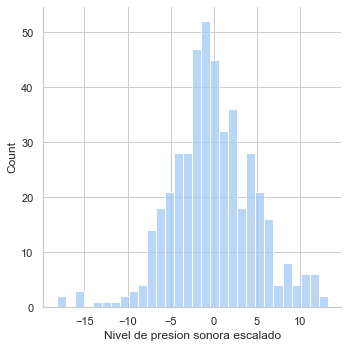

In [75]:
sns.displot((y_test-predicciones),bins=30)

# Metricas de Evaluación de Regresión

In [76]:
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 3.7082821512613124
MSE: 23.621503000664124
RMSE: 4.860195778018014


# CREAR Y ENTRENAR MODELO 2

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.30,random_state=101)

In [97]:
modeloLineal2 = LinearRegression()

In [98]:
modeloLineal2.fit(X_train2,y_train2)

LinearRegression()

# EVALUACION DEL MODELO 2

In [99]:
print("Interceptor: ",modeloLineal2.intercept_)

Interceptor:  132.62778584246504


In [100]:
print("Coeficientes:",modeloLineal2.coef_)

Coeficientes: [-1.22540597e-03 -4.18245066e-01 -3.53168415e+01  9.72773327e-02
 -1.44652778e+02]


# PREDICCIONES DEL MODELO

In [101]:
predicciones2 = modeloLineal2.predict(X_test2)

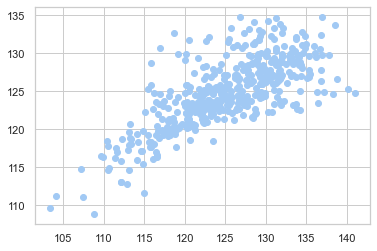

In [102]:
plt.scatter(y_test2,predicciones2)

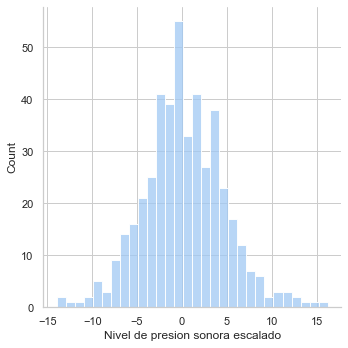

In [103]:
sns.displot((y_test2-predicciones2),bins=30)

# Metricas de Evaluación de Regresión 2

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test2, predicciones2))
print('MSE:', metrics.mean_squared_error(y_test2, predicciones2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predicciones2)))

MAE: 3.49778228413822
MSE: 20.63618796520582
RMSE: 4.5427071185809265


# CONCLUSION DEL MEJOR MODELO ELEGIDO

## MODELO 1

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 3.7082821512613124
MSE: 23.621503000664124
RMSE: 4.860195778018014


In [107]:
coeff_modelo1 = pd.DataFrame(modeloLineal.coef_,X.columns,columns=['Coeficientes'])
coeff_modelo1

,Coeficientes
Frecuencia,-0.001339
Angulo de Ataque,-0.332156
Longitud de Cuerda,-32.872480
Velocidad,0.105853
Espesor de desplazamiento,-168.679177


## MODELO 2

In [106]:
print('MAE:', metrics.mean_absolute_error(y_test2, predicciones2))
print('MSE:', metrics.mean_squared_error(y_test2, predicciones2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predicciones2)))

MAE: 3.49778228413822
MSE: 20.63618796520582
RMSE: 4.5427071185809265


In [108]:
coeff_modelo2 = pd.DataFrame(modeloLineal2.coef_,X.columns,columns=['Coeficientes'])
coeff_modelo2

,Coeficientes
Frecuencia,-0.001225
Angulo de Ataque,-0.418245
Longitud de Cuerda,-35.316841
Velocidad,0.097277
Espesor de desplazamiento,-144.652778


TENIENDO EN CONSIDERACION QUE QUEREMOS REDUCIR LAS METRICAS DE EVALUACION DE LOS ERRORES, APRECIAMOS QUE EN EL MODELO 2 SE OBTIENE MENOR VALOR TANTO EN EL **MAE**,**MSE**,**RMSE** , COMO ESTAS FUNCIONES SON DE PERDIDA NOS CONVIENE TENER LA MENOR POSIBLE , POR LO TANTO PODRIAMOS DECIR QUE EL **MODELO 2 ES MEJOR QUE EL MODELO 1**